In [1]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv('../datasets/csv/HaLT-SubjectI-160628-6St-LRHandLegTongue_experiment_2.csv')


In [2]:
df = df.sort_values(by=df.columns[0])
df = df.drop(df.columns[0], axis=1)
df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
0,9.68,4.94,14.81,-7.15,7.12,-7.51,4.37,-6.24,7.37,27.57,...,-6.91,13.08,0.03,17.50,10.84,0.52,1.83,-3.77,16.90,5
1,9.35,5.78,11.83,-7.81,6.00,-7.00,3.78,-5.90,9.11,28.38,...,-6.79,12.92,-2.95,18.53,9.41,-1.29,2.17,-2.04,23.22,5
2,8.68,4.00,11.88,-7.32,6.00,-4.95,4.90,-2.56,9.46,29.91,...,-7.49,12.84,0.28,18.65,10.66,-2.39,2.30,0.35,26.01,5
3,8.23,4.83,10.65,-6.85,5.74,-5.82,4.83,-1.01,8.35,29.23,...,-5.92,11.12,2.36,17.51,12.60,-4.16,1.03,1.00,23.46,5
4,7.26,2.91,10.40,-9.18,4.90,-4.44,3.57,-0.56,3.91,24.00,...,-8.78,9.78,-2.68,13.81,11.15,-5.85,2.48,1.55,17.46,5


<Axes: >

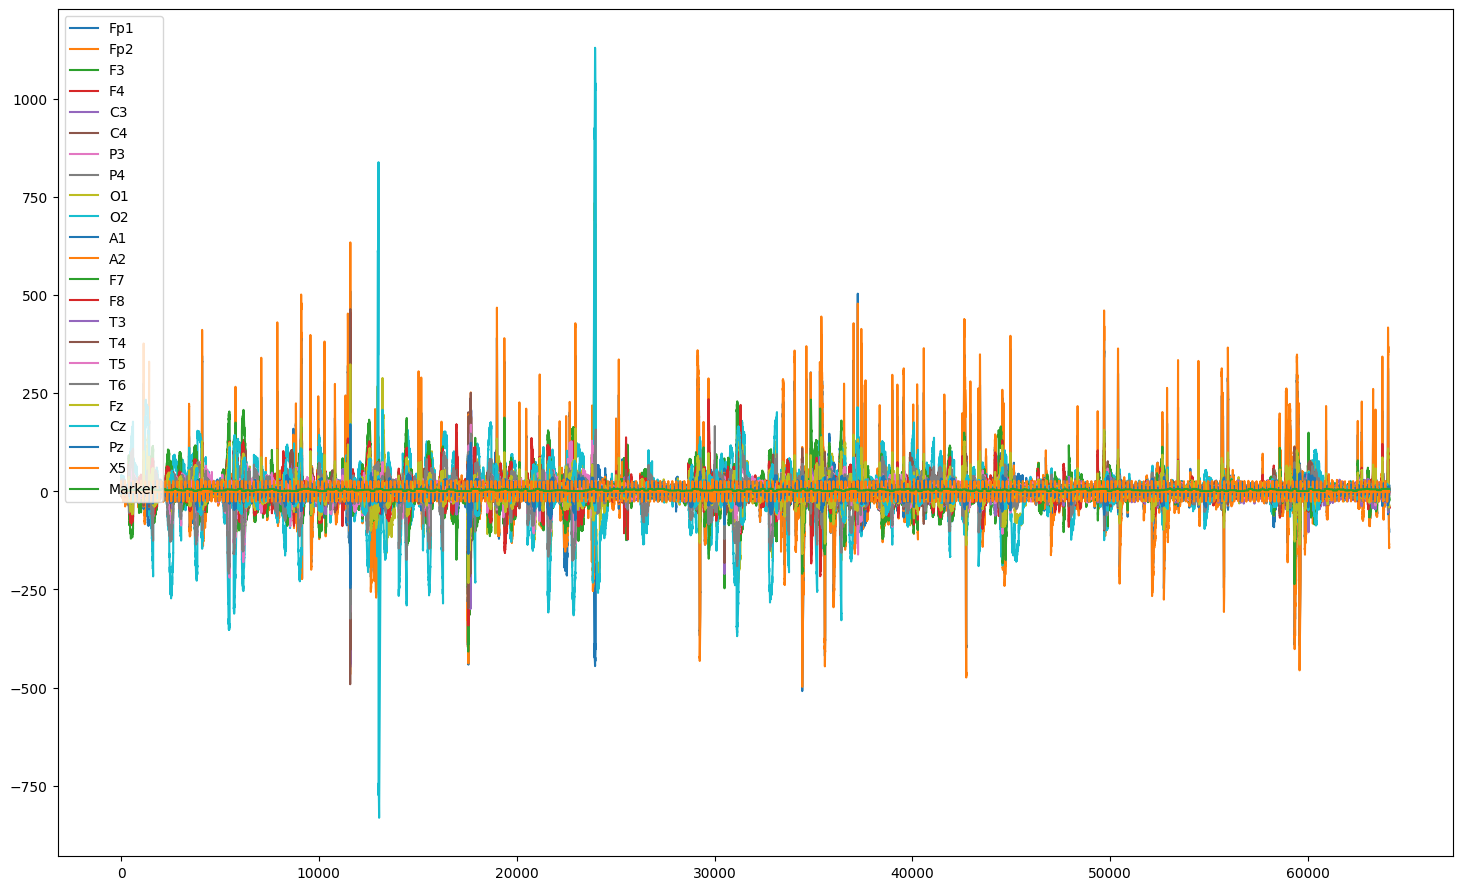

In [3]:
df.plot(kind='line', figsize=(18,11))

In [4]:
import numpy as np

print(np.unique(df['Marker']))

[1 2 3 4 5 6]


In [5]:
def print_imbalance(df):
    class_counts = df['Marker'].value_counts().sort_index()
    total_examples = sum(class_counts)

    # Proportion of classes
    for idx in class_counts.index:
        print(f'Class {idx}: {class_counts[idx]} samples; {class_counts[idx]/total_examples *100}%')

    # Rho balancing value for the dataset:
    # From: Buda, M., Maki, A., & Mazurowski, M. A. (2018). A systematic study of the class imbalance problem in convolutional neural networks. Neural Networks, 106, 249–259. https://doi.org/10.1016/j.neunet.2018.07.011


    rho = class_counts[np.argmax(class_counts)] / class_counts[np.argmin(class_counts)] 
    print(f'\nDataset Rho value: {rho}')

print_imbalance(df)

Class 1: 12411 samples; 19.362236540351642%
Class 2: 10168 samples; 15.862961980686126%
Class 3: 10378 samples; 16.19058019625891%
Class 4: 8949 samples; 13.961216243623145%
Class 5: 10182 samples; 15.884803195057644%
Class 6: 12011 samples; 18.738201844022527%


KeyError: 0

In [6]:
# Undersample majority class

print(len(np.unique(df['Marker'])))

majority_samples = len(df.loc[df['Marker'] == 0])
majority_ratio = majority_samples/(len(df)*len(np.unique(df['Marker'])))

print(f'Majority ratio: {majority_ratio}')

6
Majority ratio: 0.0


In [7]:
sample = df.loc[df['Marker'] == 0].sample(frac=majority_ratio)
print(sample)
df_test = df.loc[df['Marker'] != 0]
print(df_test)
df_test = sample.combine_first(df_test)


print(df_test)

Empty DataFrame
Columns: [Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, T4, T5, T6, Fz, Cz, Pz, X5, Marker]
Index: []

[0 rows x 23 columns]
          Fp1     Fp2     F3     F4    C3    C4    P3    P4     O1     O2  \
0        9.68    4.94  14.81  -7.15  7.12 -7.51  4.37 -6.24   7.37  27.57   
1        9.35    5.78  11.83  -7.81  6.00 -7.00  3.78 -5.90   9.11  28.38   
2        8.68    4.00  11.88  -7.32  6.00 -4.95  4.90 -2.56   9.46  29.91   
3        8.23    4.83  10.65  -6.85  5.74 -5.82  4.83 -1.01   8.35  29.23   
4        7.26    2.91  10.40  -9.18  4.90 -4.44  3.57 -0.56   3.91  24.00   
...       ...     ...    ...    ...   ...   ...   ...   ...    ...    ...   
64094  -96.34 -134.34 -18.31 -36.69 -0.31 -0.50  4.34  2.56  -5.85   8.68   
64095 -103.79 -142.83 -23.04 -41.59  2.06 -1.66 -0.80 -1.38  -8.19   5.85   
64096 -105.11 -141.08 -23.56 -38.90 -0.08  0.06  0.49  1.99  -2.96   7.45   
64097 -101.37 -144.90 -21.15 -41.80  2.99 -5.07  3.00 -0.30   2.72   6.19

<Axes: >

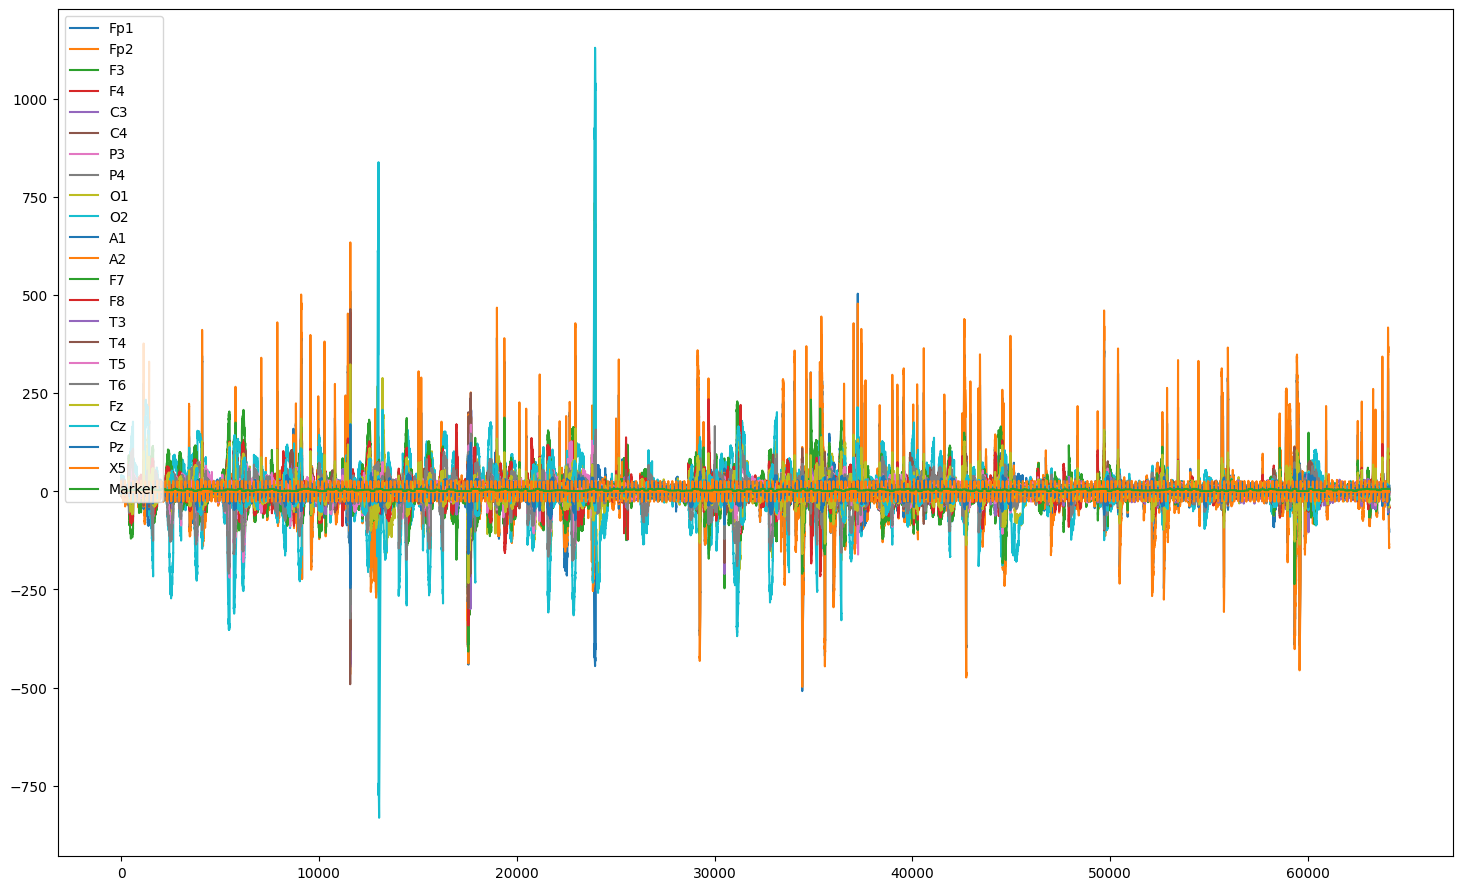

In [8]:
df_test.plot(kind='line', figsize=(18,11))

In [63]:
print_imbalance(df_test)

Class 0: 12024 samples; 15.564242628213426%
Class 1: 11830 samples; 15.313122945090221%
Class 2: 11014 samples; 14.2568669583452%
Class 3: 10194 samples; 13.195433246174955%
Class 4: 9586 samples; 12.40841898154141%
Class 5: 12827 samples; 16.603671007326483%
Class 6: 9779 samples; 12.658244233308308%

Dataset Rho value: 1.3380972251199665
